In [132]:
#%watermark -a "Chibuzor Enyioko" -d -t -v -p numpy,pandas,matplotlib

# Project 3: Unsupervised Learning

This project explores unsupervised learning methods through clustering. 

In [133]:
import numpy as np
import pandas as pd
import matplotlib as plt
import sklearn as sk

## Part 1: Cleaning the data sets

In [134]:
# importing the data sets
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import normalize

imp = SimpleImputer(missing_values=np.nan, strategy='mean')

mice_data = pd.read_csv('mice.csv')
mice_data.replace('?', np.nan, inplace=True)
mice_data_x = mice_data.drop(columns=['MouseID', 'class'])

numeric_features = mice_data_x.select_dtypes(include=[np.number])

mice_data_imp = imp.fit_transform(numeric_features)
mice_data_imp = normalize(mice_data_imp)
mice_data_imp_df = pd.DataFrame(mice_data_imp, columns=numeric_features.columns)


## Part 2: Questions
### Mice Data set

1. Run k-Means on the dataset and identify the best number (between 2 and 8)
of clusters (hint – Silhouette Scores on the right side of the k-Means box). Report this
number and its silhouette score. For non-technical track students – you may see an error
regarding the max number of allowed rows for the Hospital dataset. Report the scores that
you see regardless.


For n_clusters = 2, the average silhouette_score is : 0.301513631456305
For n_clusters = 3, the average silhouette_score is : 0.2890958228553639
For n_clusters = 4, the average silhouette_score is : 0.2798072272676955
For n_clusters = 5, the average silhouette_score is : 0.2586941516047572
For n_clusters = 6, the average silhouette_score is : 0.2804607694080909
For n_clusters = 7, the average silhouette_score is : 0.2624220006051104
For n_clusters = 8, the average silhouette_score is : 0.2704773126412326


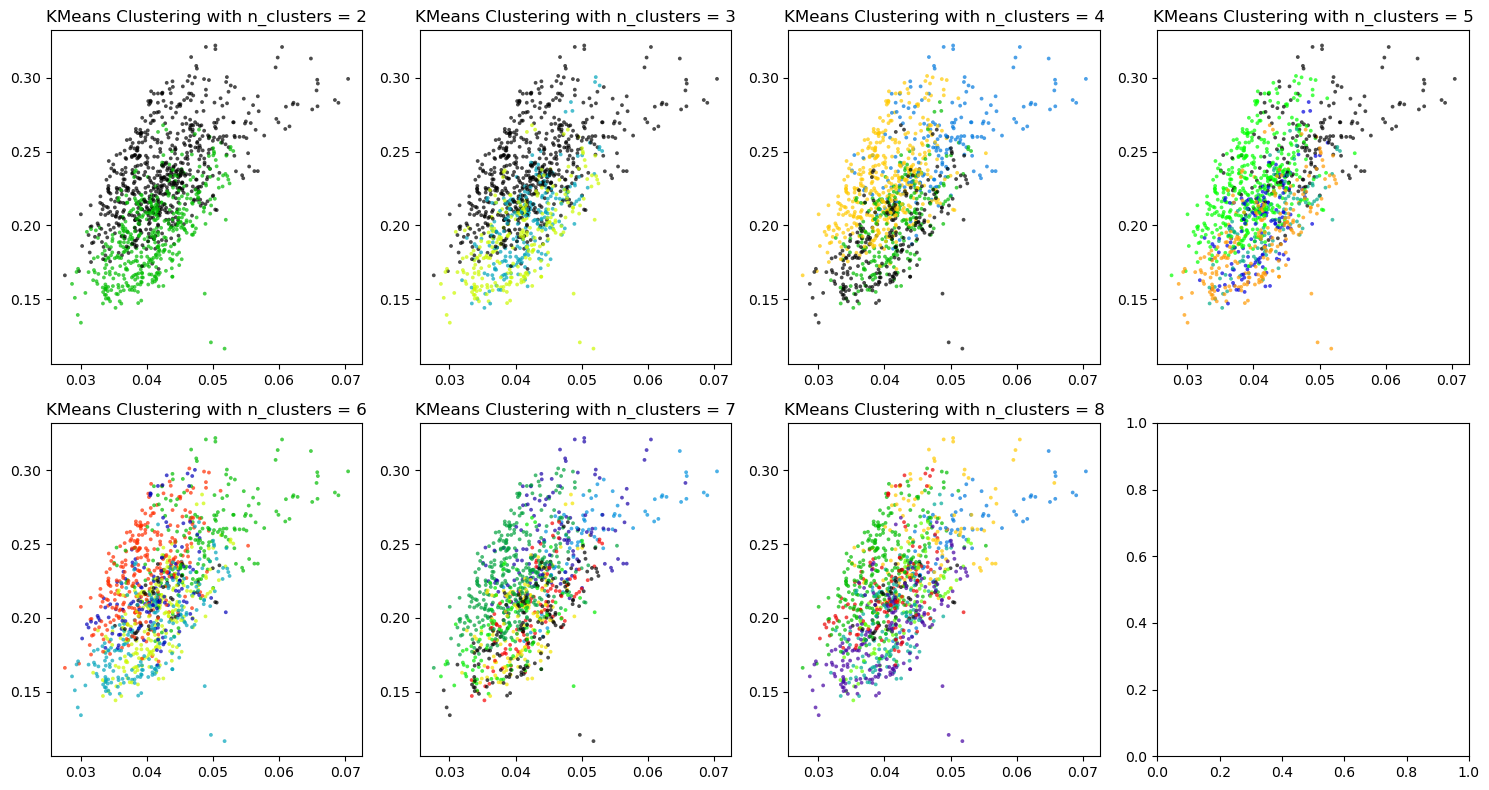

In [135]:
# kmeans clustering on mice data set
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

n_clusters = range(2, 9)
for n in n_clusters:
    kmeans = KMeans(n_clusters=n)
    cluster_labels = kmeans.fit_predict(mice_data_imp_df)
    silhouette_avg = silhouette_score(mice_data_imp_df, cluster_labels)
    print(f'For n_clusters = {n}, the average silhouette_score is : {silhouette_avg}')

# plot clusters
import matplotlib.pyplot as plt
import matplotlib.cm as cm

fig, axes = plt.subplots(2, 4, figsize=(15, 8))
axes = axes.flatten()

for i, n in enumerate(n_clusters):
    kmeans = KMeans(n_clusters=n)
    cluster_labels = kmeans.fit_predict(mice_data_imp_df)
    
    # scatter plot for all clusters

    colors = cm.nipy_spectral(cluster_labels.astype(float) / n)
    axes[i].scatter(mice_data_imp_df.iloc[:, 0], mice_data_imp_df.iloc[:, 1], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')
    axes[i].set_title(f'KMeans Clustering with n_clusters = {n}')
plt.tight_layout()
plt.show()

2. Use the best number of clusters and write the silhouette scores for individual
clusters (Manhattan distance). Use k-Means and Silhouette Plot widgets. Do this only for
the mice dataset.


In [143]:
kbest = 2
kmeans = KMeans(n_clusters=kbest)
cluster_labels_best = kmeans.fit_predict(mice_data_imp_df)

centers = kmeans.cluster_centers_
dist_matrix = sk.metrics.pairwise_distances(centers, metric='manhattan')

print("Manhattan distance for the 2 clusters")
print(dist_matrix)  

Manhattan distance for the 2 clusters
[[0.         0.54352913]
 [0.54352913 0.        ]]


3. Pick the best 5 features by “Information Gain”, and attempt Q1 again. Use the
Rank widget.


In [148]:
from sklearn.feature_selection import mutual_info_classif

y = mice_data['class']
# Calculate mutual information for each feature
mi_scores = mutual_info_classif(mice_data_imp_df, y)
mi_df = pd.DataFrame({'feature': mice_data_imp_df.columns, 'mi_score': mi_scores})
mi_df = mi_df.sort_values(by='mi_score', ascending=False)
print(mi_df.head(5))

         feature  mi_score
27        CaNA_N  0.690896
3        pPKCG_N  0.615451
7   AcetylH3K9_N  0.552379
22   Ubiquitin_N  0.450913
20       PSD95_N  0.410142


For n_clusters = 2, the average silhouette_score is : 0.3936459911997088
For n_clusters = 3, the average silhouette_score is : 0.4047757310960073
For n_clusters = 4, the average silhouette_score is : 0.4016192592409387
For n_clusters = 5, the average silhouette_score is : 0.4311743456431838
For n_clusters = 6, the average silhouette_score is : 0.3885287409272272
For n_clusters = 7, the average silhouette_score is : 0.33378527825750987
For n_clusters = 8, the average silhouette_score is : 0.3319977363817377


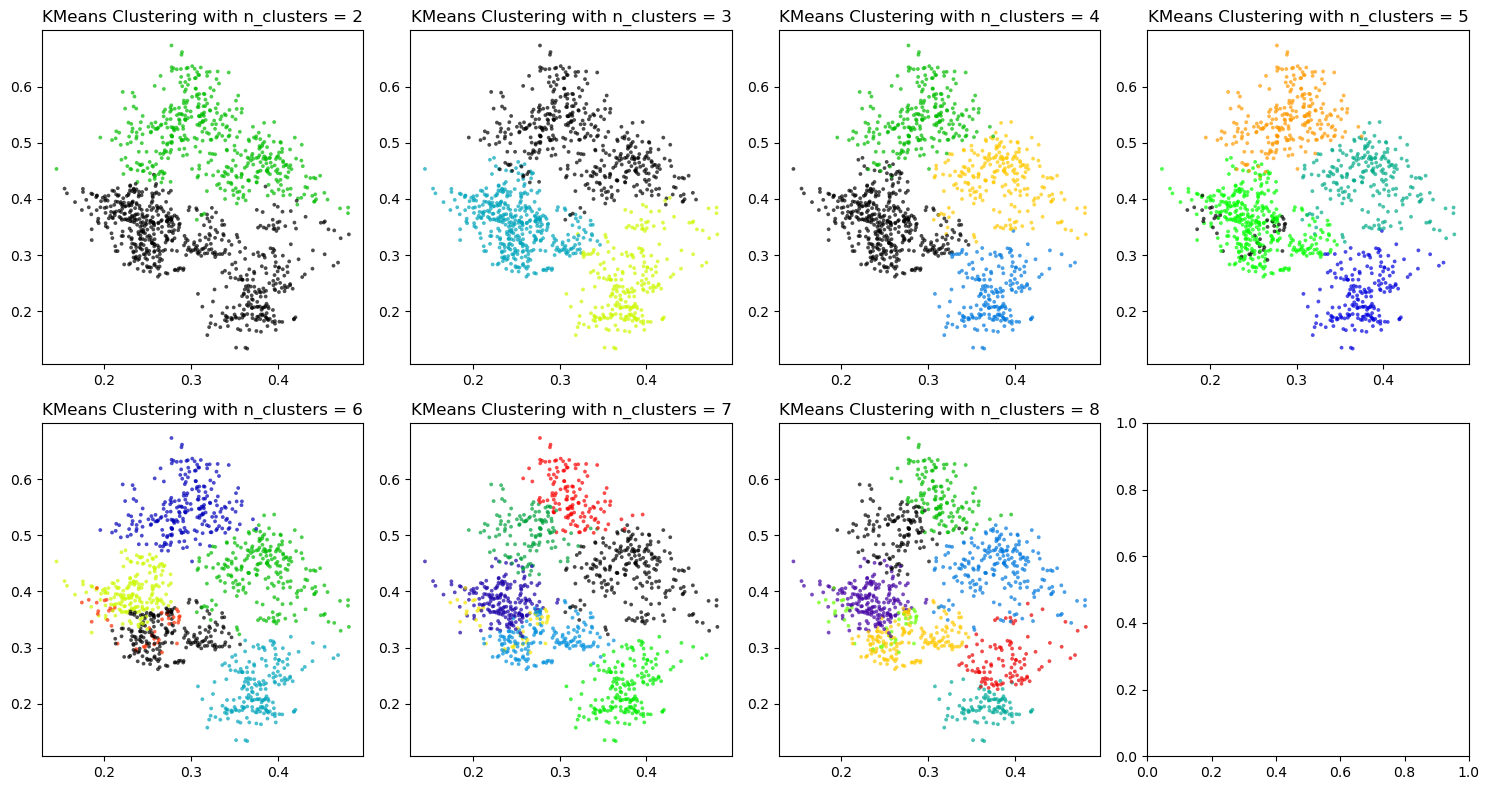

In [139]:
# selecting the top 5 features based on mutual information scores
mice_data_subset = mice_data_imp_df[['CaNA_N', 'pPKCG_N', 'AcetylH3K9_N', 'Ubiquitin_N', 'PSD95_N']]

# kmeans clustering on mice data subset
n_clusters = range(2, 9)
for n in n_clusters:
    kmeans = KMeans(n_clusters=n)
    cluster_labels = kmeans.fit_predict(mice_data_subset)
    silhouette_avg = silhouette_score(mice_data_subset, cluster_labels)
    print(f'For n_clusters = {n}, the average silhouette_score is : {silhouette_avg}')

# plot clusters
import matplotlib.pyplot as plt
import matplotlib.cm as cm

fig, axes = plt.subplots(2, 4, figsize=(15, 8))
axes = axes.flatten()

for i, n in enumerate(n_clusters):
    kmeans = KMeans(n_clusters=n)
    cluster_labels = kmeans.fit_predict(mice_data_subset)
    
    # scatter plot for all clusters

    colors = cm.nipy_spectral(cluster_labels.astype(float) / n)
    axes[i].scatter(mice_data_subset.iloc[:, 0], mice_data_subset.iloc[:, 1], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')
    axes[i].set_title(f'KMeans Clustering with n_clusters = {n}')
    
plt.tight_layout()
plt.show()


4. [Extra Credit: 10 points] Try to maximize performance using a supervised method.
Points will be awarded based on the relative rank of students who participate in the extra credit. Include the workbook in your submission.


In [174]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

clf = RandomForestClassifier()
X_train, X_test, y_train, y_test = train_test_split(mice_data_imp_df, y)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

from sklearn.metrics import classification_report

feature_names = mice_data_imp_df.columns
importances = clf.feature_importances_
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Display of table
print(importance_df[:5])
print(classification_report(y_test, y_pred))



        Feature  Importance
27       CaNA_N    0.106426
3       pPKCG_N    0.067125
20      PSD95_N    0.062773
22  Ubiquitin_N    0.058773
13        Tau_N    0.047528
              precision    recall  f1-score   support

      c-CS-m       1.00      0.98      0.99        45
      c-CS-s       0.97      1.00      0.98        31
      c-SC-m       1.00      0.98      0.99        41
      c-SC-s       1.00      0.96      0.98        27
      t-CS-m       1.00      1.00      1.00        31
      t-CS-s       1.00      1.00      1.00        27
      t-SC-m       0.97      1.00      0.99        36
      t-SC-s       0.97      1.00      0.98        32

    accuracy                           0.99       270
   macro avg       0.99      0.99      0.99       270
weighted avg       0.99      0.99      0.99       270



For n_clusters = 2, the average silhouette_score is : 0.4164851999706744
For n_clusters = 3, the average silhouette_score is : 0.36150328242479557
For n_clusters = 4, the average silhouette_score is : 0.43503085159466776
For n_clusters = 5, the average silhouette_score is : 0.40501376940249995
For n_clusters = 6, the average silhouette_score is : 0.3394998728943253
For n_clusters = 7, the average silhouette_score is : 0.36062332471484665
For n_clusters = 8, the average silhouette_score is : 0.31275892487876783


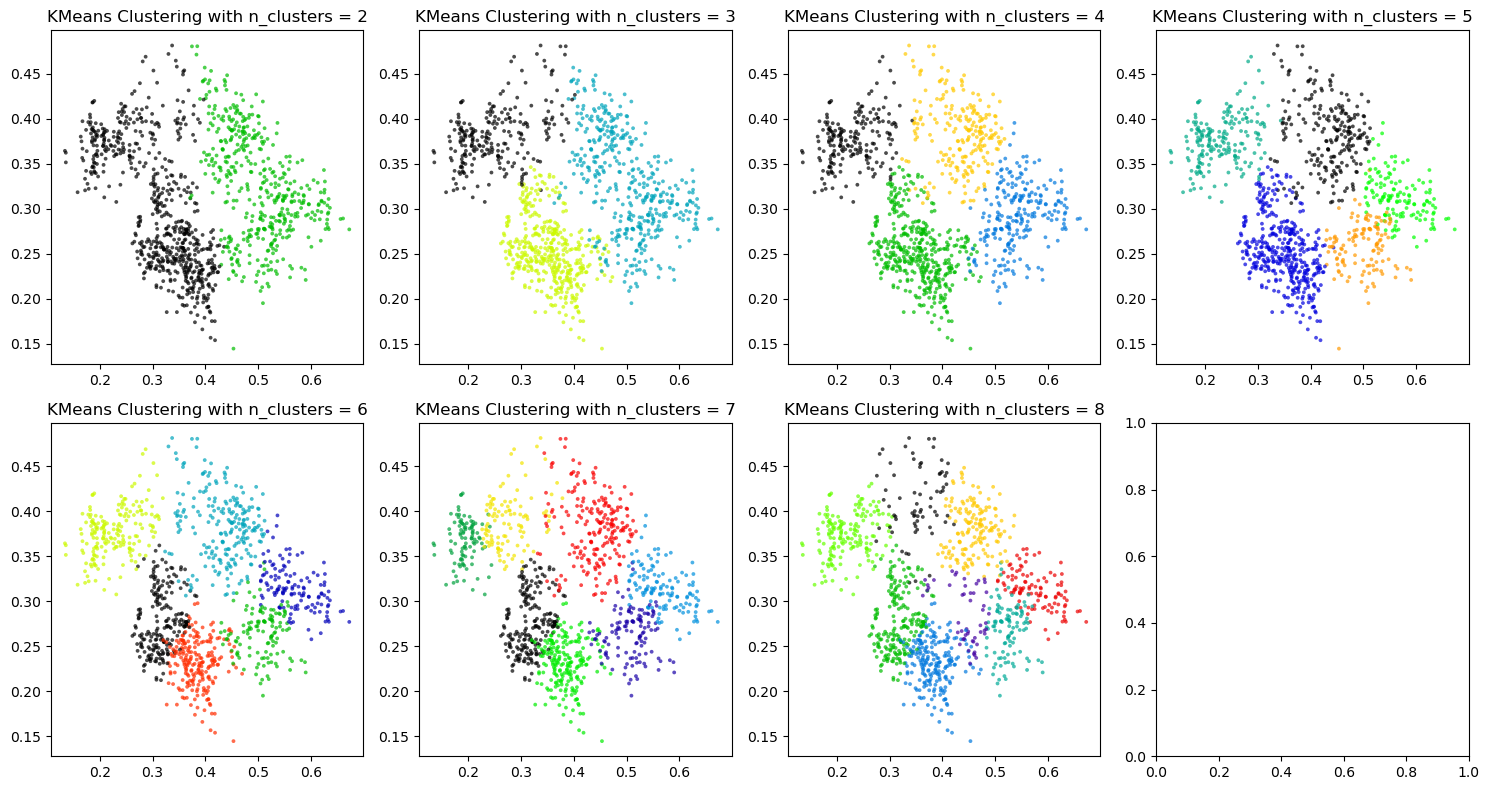

In [175]:
# selecting the top 5 features based on mutual information scores
mice_data_subset = mice_data_imp_df[['pPKCG_N', 'CaNA_N', 'Tau_N', 'PSD95_N', 'Ubiquitin_N']]

# kmeans clustering on mice data subset
n_clusters = range(2, 9)
for n in n_clusters:
    kmeans = KMeans(n_clusters=n)
    cluster_labels = kmeans.fit_predict(mice_data_subset)
    silhouette_avg = silhouette_score(mice_data_subset, cluster_labels)
    print(f'For n_clusters = {n}, the average silhouette_score is : {silhouette_avg}')

# plot clusters
import matplotlib.pyplot as plt
import matplotlib.cm as cm

fig, axes = plt.subplots(2, 4, figsize=(15, 8))
axes = axes.flatten()

for i, n in enumerate(n_clusters):
    kmeans = KMeans(n_clusters=n)
    cluster_labels = kmeans.fit_predict(mice_data_subset)
    
    # scatter plot for all clusters

    colors = cm.nipy_spectral(cluster_labels.astype(float) / n)
    axes[i].scatter(mice_data_subset.iloc[:, 0], mice_data_subset.iloc[:, 1], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')
    axes[i].set_title(f'KMeans Clustering with n_clusters = {n}')
    
plt.tight_layout()
plt.show()

Using a random forest classifier, the most significant features were identified try and generate meaningful clusters. The 5 most important features were selected, resulting as a k of 4 being the best way to cluster the data. 